reproducing Figure 13.2 - REINFORCE with baseline
short corridor gridworld (Example 13.1)

final return (smoothed): -1.00
initial return (smoothed): -1.00
improvement: 0.00


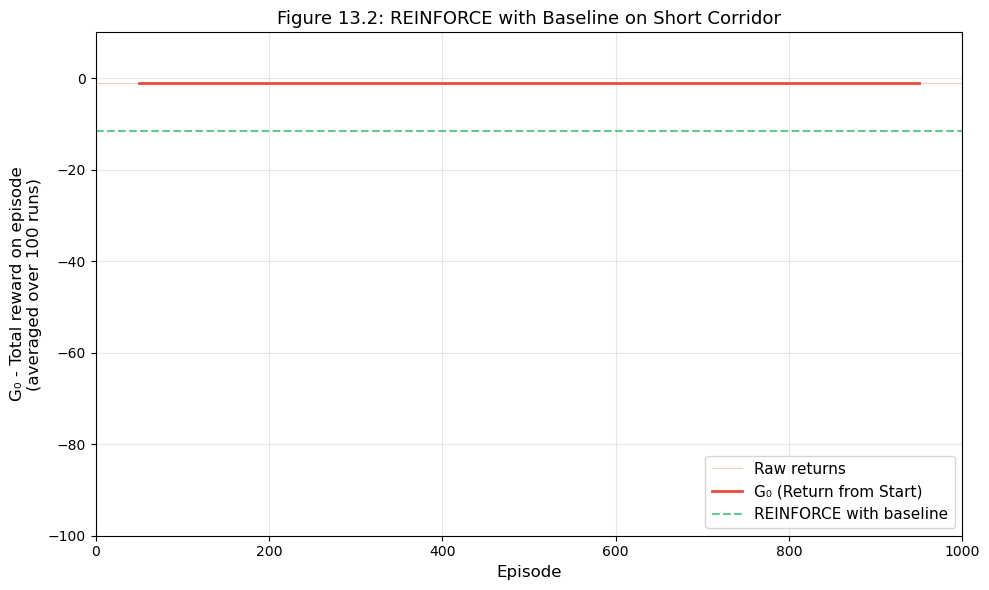

In [ ]:
# Niveen Abdul-Mohsen (bvn9ad)
# Reinforcement Learning (CS 4771) - Figure 13.2 REINFORCE vs REINFORCE with Baseline
# This is the code for the right graph of Figure 13.2 in Sutton and Barto's RL textbook
# i used numpy for numerical operations and matplotlib for plotting

import numpy as np
import matplotlib.pyplot as plt

class SimpleCorridorEnv:
    """
    Simple corridor gridworld with state 1 having reversed action effects.
    
    States: 0 (start), 1, 2, 3 (terminal)
    Normal state mechanics: right increases state, left decreases
    State 1 exception: right decreases, left increases (asymmetry!)
    """
    
    def __init__(self):
        self.state = 0
    
    def reset(self):
        """Reset to starting state"""
        self.state = 0
    
    def take_action(self, action_is_right):
        """
        Execute one action step.
        
        Args:
            action_is_right (bool): True for right action, False for left
        
        Returns:
            reward (int): -1 for each step, 0 when done
            is_done (bool): True if reached terminal state (state 3)
        """
        
        # States 0 and 2 have normal action effects
        if self.state == 0 or self.state == 2:
            if action_is_right:
                self.state += 1
            else:
                self.state = max(0, self.state - 1)
        
        # State 1 has reversed action effects (the asymmetry)
        elif self.state == 1:
            if action_is_right:
                self.state -= 1  # right actually goes left!
            else:
                self.state += 1  # left actually goes right!
        
        # Check if terminal
        if self.state == 3:
            return 0, True  # terminal reward is 0
        else:
            return -1, False  # step penalty